In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

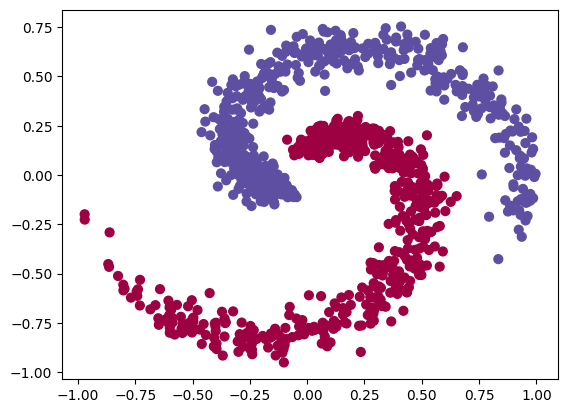

In [341]:

N = 500 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='int') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.1,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.3 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [342]:
X[:,0].shape, X[:,1].shape

((1000,), (1000,))

In [343]:
spiral = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
spiral

,X0,X1,label
0,0.005873,0.099827,0
1,0.054352,0.086080,0
2,0.013631,0.102707,0
3,0.029917,0.101076,0
4,0.018939,0.105528,0
...,...,...,...
995,0.985794,-0.117612,1
996,0.985794,0.131976,1
997,0.996376,0.005798,1
998,0.956482,0.285549,1


In [344]:
X[1],y[1]

(array([0.05435236, 0.08608017]), 0)

In [345]:
X.shape, y.shape

((1000, 2), (1000,))

In [346]:
def plot_decision_boundary(model,X,y):
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx,yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(),yy.ravel()]
    y_pred = model.predict(x_in)

    if len(y_pred[0])>1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx,yy,y_pred,cmap=plt.cm.Spectral,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.Spectral)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

In [375]:
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

class Swish(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Swish, self).__init__(**kwargs)
        self.beta = self.add_weight(name='beta', shape=(), 
                                    initializer='ones', 
                                    trainable=True)

    def call(self, inputs):
        return inputs * tf.keras.activations.sigmoid(self.beta * inputs)

    
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=tf.keras.activations.relu),
    Swish(),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

model.compile(loss=tf.keras.losses.binary_crossentropy,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["accuracy"])

history = model.fit(X, y, epochs=100, callbacks=[callback])

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.5472 - accuracy: 0.7180
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3849 - accuracy: 0.7540
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.8600
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9110
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1799 - accuracy: 0.9370
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1409 - accuracy: 0.9590
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1139 - accuracy: 0.9740
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9780
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0814 - accuracy: 0.9850
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9900
Epoch 11/

In [376]:
model.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 1.0000


[0.01101573184132576, 1.0]

<Axes: >

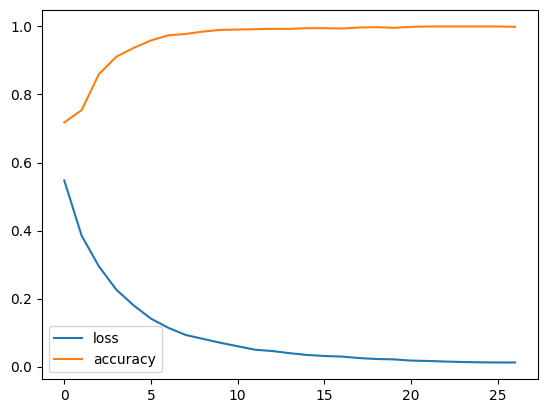

In [377]:
pd.DataFrame(history.history).plot()

313/313 [==============================] - 1s 1ms/step
doing binary classification


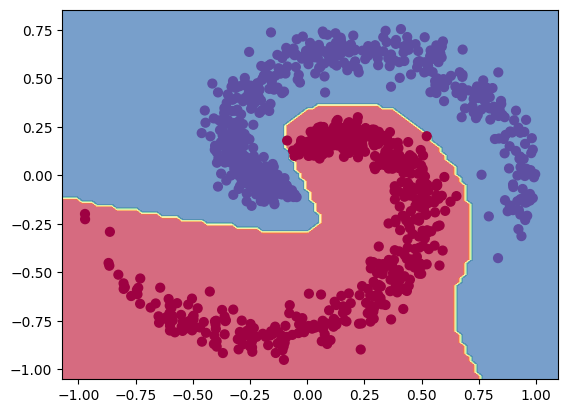

In [378]:
plot_decision_boundary(model=model,X=X,y=y)

In [383]:
toy = tf.cast(tf.range(-10,10),tf.float32)
toy

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

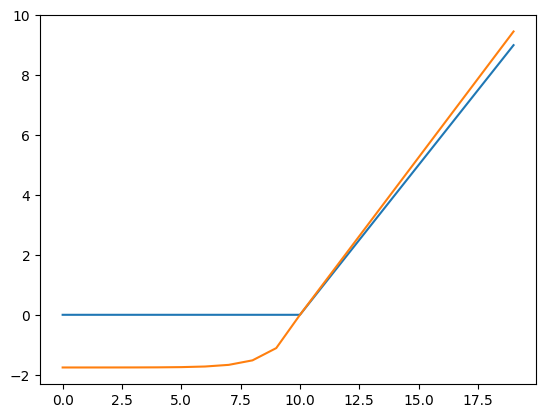

In [415]:
plt.plot(tf.keras.activations.relu(toy,));
#plt.plot(tf.keras.activations.elu(toy));
#plt.plot(tf.keras.activations.gelu(toy));
plt.plot(tf.keras.activations.selu(toy));
